<a href="https://colab.research.google.com/github/MarMarhoun/freelance_work/blob/main/side_projects/NLP_projs/Sentiment_analysis_amazon/product_review_sa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project descreption:
Amazon gives a platform to small businesses and companies with modest resources to grow larger. And Because of its popularity, people actually spend time and write detailed reviews, about the brand and the product. So, by analyzing that data we can tell companies a lot about their products and also the ways to enhance the quality of the product. But that large amount of data can not be analyzed by a person.

Amazon Product Reviews Sentiment Analysis in Python
So here comes the Machine learning part, i.e. Natural Language Processing (NLP) to overcome the problem of large datasets and analyze it. Our task is to predict whether the review given is positive or negative. The real dataset after scraping the website might include millions of reviews. So we preprocessed the data for you,

Before starting the code, download the dataset by clicking the [link](http://deepyeti.ucsd.edu/jianmo/amazon/sample/meta_Computers.json.gz). 

> You can find version of the dataset that contains reviews and label [here](https://drive.google.com/file/d/1yXhMGfaElSHpjz5CXa9UxAtV7A7i14hl/view?usp=sharing).

> ## Packages installation:

GPU: To install the cuML package you use the following commands:

In [ ]:
# cuML & cuda
#!pip install cudf-cu11 dask-cudf-cu11 --extra-index-url=https://pypi.ngc.nvidia.com
#pip install cuml-cu11 --extra-index-url=https://pypi.ngc.nvidia.com
#pip install cugraph-cu11 --extra-index-url=https://pypi.ngc.nvidia.com

!pip install cuml-cu11 --extra-index-url=https://pypi.ngc.nvidia.com


In [ ]:
# The XGBoost installation
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# install transformers
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 12.2 MB/s eta 0:00:00


> ## Load & Preprocess the dataset

In [2]:
# import the libraries
import gc

import pandas as pd
import numpy as np
import re
import gzip

import matplotlib.pyplot as plt
import seaborn as sns

from bs4 import BeautifulSoup
#from cuml.model_selection import train_test_split
#from cuml.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay

In [3]:
# Download the data ffrom the link below

!wget https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_PC_v1_00.tsv.gz

--2023-02-18 17:12:34--  https://s3.amazonaws.com/amazon-reviews-pds/tsv/amazon_reviews_us_PC_v1_00.tsv.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.79.54, 54.231.199.40, 52.216.36.168, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.79.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1512903923 (1.4G) [application/x-gzip]
Saving to: ‘amazon_reviews_us_PC_v1_00.tsv.gz’

amazon_reviews_us_P 100%[===================>]   1.41G  81.5MB/s    in 18s     

2023-02-18 17:12:52 (81.7 MB/s) - ‘amazon_reviews_us_PC_v1_00.tsv.gz’ saved [1512903923/1512903923]



In [ ]:
########### ADDITIONAL data --- OPTIONAL  


#!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_Computers.json.gz



!wget http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_.json.gz

#!wget http://deepyeti.ucsd.edu/jianmo/amazon/sample/meta_Computers.json.gz

--2023-01-31 02:06:26--  http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/meta_.json.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49712010 (47M) [application/x-gzip]
Saving to: ‘meta_.json.gz’

meta_.json.gz       100%[===================>]  47.41M  12.3MB/s    in 6.8s    

2023-01-31 02:06:33 (6.97 MB/s) - ‘meta_.json.gz’ saved [49712010/49712010]



In [4]:
# read data from .tsv file and skp any bad lines in the file

with gzip.open('amazon_reviews_us_PC_v1_00.tsv.gz') as f:
  data_raw = pd.read_csv(f, sep='\t', error_bad_lines=False)

data = data_raw.copy()
del data_raw

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 42306: expected 15 fields, saw 22\nSkipping line 61136: expected 15 fields, saw 22\nSkipping line 64592: expected 15 fields, saw 22\n'
b'Skipping line 73268: expected 15 fields, saw 22\nSkipping line 80720: expected 15 fields, saw 22\nSkipping line 120624: expected 15 fields, saw 22\nSkipping line 121776: expected 15 fields, saw 22\n'
b'Skipping line 154351: expected 15 fields, saw 22\nSkipping line 155937: expected 15 fields, saw 22\n'
b'Skipping line 203615: expected 15 fields, saw 22\nSkipping line 208061: expected 15 fields, saw 22\nSkipping line 212638: expected 15 fields, saw 22\nSkipping line 219390: expected 15 fields, saw 22\nSkipping line 235195: expected 15 fields, saw 22\n'
b'Skipping line 284570: expected 15 fields, saw 22\n

In [5]:
del f 
gc.collect()

0

In [ ]:
# print data records
data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,22873041,R3ARRMDEGED8RD,B00KJWQIIC,335625766,Plemo 14-Inch Laptop Sleeve Case Waterproof Fa...,PC,5,0,0,N,Y,Pleasantly surprised,I was very surprised at the high quality of th...,2015-08-31
1,US,30088427,RQ28TSA020Y6J,B013ALA9LA,671157305,TP-Link OnHub AC1900 Wireless Wi-Fi Router,PC,5,24,31,N,N,OnHub is a pretty no nonsense type router that...,I am a Google employee and had to chance to us...,2015-08-31
2,US,20329786,RUXJRZCT6953M,B00PML2GQ8,982036237,AmazonBasics USB 3.0 A Male to A Male Cable - ...,PC,1,2,2,N,N,None of them worked. No functionality at all.,"Bought cables in 3ft, 6ft and 9ft. NONE of th...",2015-08-31
3,US,14215710,R7EO0UO6BPB71,B001NS0OZ4,576587596,Transcend P8 15-in-1 USB 2.0 Flash Memory Card...,PC,1,0,0,N,Y,just keep searching.,"nope, cheap and slow",2015-08-31
4,US,38264512,R39NJY2YJ1JFSV,B00AQMTND2,964759214,Aleratec SATA Data Cable 2.0 20in Serial ATA S...,PC,5,0,0,N,Y,Five Stars,Excellent! Great value and does the job.,2015-08-31


In [ ]:
# Data columns

data.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date'],
      dtype='object')

In [ ]:
# More infos of the data

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6906869 entries, 0 to 6906868
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int64(5), object(10)
memory usage: 790.4+ MB


In [ ]:
# Describe the data

data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,6906869.0,2.799231e+07,1.557232e+07,10016.0,14419879.0,26788370.0,42661998.0,53096585.0
product_parent,6906869.0,4.916630e+08,2.890114e+08,1602.0,242889999.0,488442804.0,742902061.0,999996025.0
star_rating,6906869.0,4.086452e+00,1.362860e+00,1.0,4.0,5.0,5.0,5.0
helpful_votes,6906869.0,1.484546e+00,4.149058e+01,0.0,0.0,0.0,1.0,47524.0
total_votes,6906869.0,1.962190e+00,4.306994e+01,0.0,0.0,0.0,1.0,48362.0


In [ ]:
print ("Data rows before removing null values",data.shape[0])

Data rows before removing null values 6906869


In [ ]:
# check the number of null values per column
print(data.isnull().sum())

marketplace            0
customer_id            0
review_id              0
product_id             0
product_parent         0
product_title          2
product_category       0
star_rating            0
helpful_votes          0
total_votes            0
vine                   0
verified_purchase      0
review_headline       70
review_body          199
review_date           34
dtype: int64


> ### Data cleaning

In [ ]:
# replace null values with nan
data.replace('',np.nan,inplace=True)

In [ ]:
# drop nan values in the data
data.dropna(axis=0, how='any', inplace=True)

#################################

In [ ]:
# function to remove html elements from the reviews
def removeHTML(raw_text):
    clean_HTML = BeautifulSoup(raw_text, 'lxml').get_text() 
    return clean_HTML

In [ ]:
# function to remove special characters and numbers from the reviews4961
def removeSpecialChar(raw_text):
    clean_SpecialChar = re.sub("[^a-zA-Z]", " ", raw_text)  
    return clean_SpecialChar

In [ ]:
# function to convert all reviews into lower case
def toLowerCase(raw_text):
    clean_LowerCase = raw_text.lower().split()
    return( " ".join(clean_LowerCase))  

In [6]:
# function to remove stop words from the reviews

from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

def removeStopWords(raw_text):
    stops = set(ENGLISH_STOP_WORDS)
    words = [w for w in raw_text if not w in stops]
    return (" ".join(words))

In [ ]:
##### Removing Emojis -- OPTIONAL
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emoji("Omg another Earthquake 😔😔")


In [ ]:
stopwords = list(ENGLISH_STOP_WORDS)
stopwords

['thence',
 'five',
 'much',
 'it',
 'behind',
 'per',
 'once',
 'what',
 'forty',
 'no',
 'empty',
 'ltd',
 'everywhere',
 'although',
 'whole',
 'fill',
 'nowhere',
 'an',
 'its',
 'nobody',
 'ourselves',
 'thereupon',
 'via',
 'thick',
 'thus',
 'enough',
 'their',
 'against',
 'thereafter',
 'side',
 'himself',
 'became',
 'is',
 'else',
 'even',
 'onto',
 'without',
 'indeed',
 'itself',
 'beforehand',
 'some',
 'by',
 'put',
 'hereupon',
 'however',
 'ie',
 'de',
 'whither',
 'same',
 'wherever',
 'who',
 'another',
 'are',
 'fifteen',
 'so',
 'ours',
 'please',
 'any',
 'hasnt',
 'them',
 'whose',
 'go',
 'amongst',
 'where',
 'all',
 'detail',
 're',
 'from',
 'hence',
 'front',
 'we',
 'twenty',
 'during',
 'call',
 'well',
 'whereafter',
 'this',
 'under',
 'bottom',
 'there',
 'if',
 'throughout',
 'system',
 'around',
 'through',
 'fifty',
 'yours',
 'few',
 'into',
 'eg',
 'besides',
 'together',
 'before',
 'meanwhile',
 'towards',
 'such',
 'though',
 'someone',
 'everyt

#################################

In [7]:
### OR you can this function here to clean your data


import string
# Special thanks to https://www.kaggle.com/tanulsingh077 for this function
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text



#################################

########## After cleaning

In [ ]:
# check the number of null values per column replacing with nan and dropping nan
print(data.isnull().sum())

marketplace          0
customer_id          0
review_id            0
product_id           0
product_parent       0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64


In [ ]:
print ("Data rows after removing null values",data.shape[0])

Data rows after removing null values 6906564


In [8]:
# adding a sentiment column to classify reviews as Positive or Negative
# Positive = 1
# Negative = 0

data['sentiment'] = np.where(data['star_rating'] == 5.0, 1,
                           np.where(data['star_rating'] == 4.0, 1, 0))

In [ ]:
data.star_rating.unique()

array([5, 1, 3, 4, 2])

In [ ]:
# Display the first 5 rows 

data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment
0,US,22873041,R3ARRMDEGED8RD,B00KJWQIIC,335625766,Plemo 14-Inch Laptop Sleeve Case Waterproof Fa...,PC,5,0,0,N,Y,Pleasantly surprised,I was very surprised at the high quality of th...,2015-08-31,1
1,US,30088427,RQ28TSA020Y6J,B013ALA9LA,671157305,TP-Link OnHub AC1900 Wireless Wi-Fi Router,PC,5,24,31,N,N,OnHub is a pretty no nonsense type router that...,I am a Google employee and had to chance to us...,2015-08-31,1
2,US,20329786,RUXJRZCT6953M,B00PML2GQ8,982036237,AmazonBasics USB 3.0 A Male to A Male Cable - ...,PC,1,2,2,N,N,None of them worked. No functionality at all.,"Bought cables in 3ft, 6ft and 9ft. NONE of th...",2015-08-31,0
3,US,14215710,R7EO0UO6BPB71,B001NS0OZ4,576587596,Transcend P8 15-in-1 USB 2.0 Flash Memory Card...,PC,1,0,0,N,Y,just keep searching.,"nope, cheap and slow",2015-08-31,0
4,US,38264512,R39NJY2YJ1JFSV,B00AQMTND2,964759214,Aleratec SATA Data Cable 2.0 20in Serial ATA S...,PC,5,0,0,N,Y,Five Stars,Excellent! Great value and does the job.,2015-08-31,1


> ### Target distribution

In [ ]:
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

# Defining all our palette colours.
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

primary_green = px.colors.qualitative.Plotly[2]

In [ ]:
# Now we are going to take a look about the target distribution and the messages length.

balance_counts = data.groupby('sentiment')['sentiment'].agg('count').values
balance_counts

array([1632669, 5273895])

In [ ]:
id = 0
for i in data['sentiment']:
  if i ==1:
    id += 1


In [ ]:
id # This is the positive sentiment

5273895

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Negative'],
    y=[balance_counts[0]],
    name='Negative',
    text=[balance_counts[0]],
    textposition='auto',
    marker_color=primary_blue
))
fig.add_trace(go.Bar(
    x=['Positive'],
    y=[balance_counts[1]],
    name='Positive',
    text=[balance_counts[1]],
    textposition='auto',
    marker_color=primary_grey
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman"> Dataset distribution by Sentiment </span>'
)
fig.show()

> As we can see, the classes are imbalanced, so we can consider using some kind of resampling.




> ### Export the cleaned data

In [ ]:
# export the data frame to a .csv file
data.to_csv (r'amazon_electronics.csv', index = False, header=True)

> ## Training section

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

> For computation reason, I will use 10% of the dataset for the BERT model. For the other models, I used just 1% of the dataset. Because the session keep crushing.

In [9]:
sampled_df = data.sample(frac=0.1) # Get 30% of the data


In [ ]:
# export the data frame to a .csv file
sampled_df.to_csv (r'amazon_electronics_1per.csv', index = False, header=True)

In [ ]:
# For 40% of the dataset -- For TPU

print('The size of the dataset:',len(data))
print('The size of the sampled dataset:',len(sampled_df))

The size of the dataset: 6906564
The size of the sampled dataset: 2762626


In [10]:
# For 10% of the dataset

print('The size of the dataset:',len(data))
print('The size of the sampled dataset:',len(sampled_df))

The size of the dataset: 6906869
The size of the sampled dataset: 690687


In [ ]:
# Now we are going to take a look about the target distribution and the messages length.

bal_counts_sp = sampled_df.groupby('sentiment')['sentiment'].agg('count').values
bal_counts_sp

array([16083, 52983])

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Negative'],
    y=[bal_counts_sp[0]],
    name='Negative',
    text=[bal_counts_sp[0]],
    textposition='auto',
    marker_color=primary_blue
))
fig.add_trace(go.Bar(
    x=['Positive'],
    y=[bal_counts_sp[1]],
    name='Positive',
    text=[bal_counts_sp[1]],
    textposition='auto',
    marker_color=primary_grey
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman"> Sampled Dataset distribution by Sentiment </span>'
)
fig.show()

> ### First Cleaning

For the training section, you use all the following columns \[star_rating,	helpful_votes,	total_votes,	vine,	verified_purchase,	review_headline,	review_body].

Or you can use just the 'review_body' which contains additional infos that could help during the training, and the target col.


In [11]:
## You can use this to clean the data before the splitting phase

sampled_df['message_clean'] = sampled_df['review_body'].apply(clean_text)
sampled_df.head()


,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment,message_clean
3468360,US,30265932,R1WIL5GFG2YO02,B003LR7ME6,689531259,Snugg Leather iPad Case with Lifetime Guarante...,PC,5,0,0,N,Y,Love the Snugg Leather ipad Case,The Snug Leather ipad case met all my expectat...,2014-03-16,1,the snug leather ipad case met all my expectat...
1008467,US,31783085,R3996DATCBZ2D8,B005IPKU48,216794494,I-Rocks Black Aluminum X-Slim Keyboard for PC,PC,5,0,0,N,Y,Very good keyboard,I immediately retired my previous keyboard upo...,2015-04-09,1,i immediately retired my previous keyboard upo...
3396469,US,37032517,R3M1PPZ80UVPBE,B0083J3TCQ,77936083,rooCASE Neoprene Sleeve Carrying Case for West...,PC,5,0,0,N,Y,"Durable, Cute, Functional",I got this case for my WD My Passport Ultra 2T...,2014-04-01,1,i got this case for my wd my passport ultra p...
2484770,US,18790660,R1ROBYPXAWRED3,B005QX7KYU,571015997,Insten Micro USB OTG to USB 2.0 Adapter Cable,PC,5,0,0,N,N,Five Stars,Great product for the price.,2014-10-03,1,great product for the price
1097790,US,18171383,RL06NFPZEXBH8,B00KFAGCWK,531845434,LEXAR MEDIA INC Crucial MX100 SATA 2.5-Inch 7m...,PC,5,0,0,N,Y,Five Stars,My laptop was like a Phoenix from the flame af...,2015-03-27,1,my laptop was like a phoenix from the flame af...


In [12]:
# Removing the stop words

stop_words = list(ENGLISH_STOP_WORDS)
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
sampled_df['message_clean'] = sampled_df['message_clean'].apply(remove_stopwords)
sampled_df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,sentiment,message_clean
3468360,US,30265932,R1WIL5GFG2YO02,B003LR7ME6,689531259,Snugg Leather iPad Case with Lifetime Guarante...,PC,5,0,0,N,Y,Love the Snugg Leather ipad Case,The Snug Leather ipad case met all my expectat...,2014-03-16,1,snug leather ipad case met expectations bough...
1008467,US,31783085,R3996DATCBZ2D8,B005IPKU48,216794494,I-Rocks Black Aluminum X-Slim Keyboard for PC,PC,5,0,0,N,Y,Very good keyboard,I immediately retired my previous keyboard upo...,2015-04-09,1,immediately retired previous keyboard receivin...
3396469,US,37032517,R3M1PPZ80UVPBE,B0083J3TCQ,77936083,rooCASE Neoprene Sleeve Carrying Case for West...,PC,5,0,0,N,Y,"Durable, Cute, Functional",I got this case for my WD My Passport Ultra 2T...,2014-04-01,1,got case wd passport ultra portable external ...
2484770,US,18790660,R1ROBYPXAWRED3,B005QX7KYU,571015997,Insten Micro USB OTG to USB 2.0 Adapter Cable,PC,5,0,0,N,N,Five Stars,Great product for the price.,2014-10-03,1,great product price
1097790,US,18171383,RL06NFPZEXBH8,B00KFAGCWK,531845434,LEXAR MEDIA INC Crucial MX100 SATA 2.5-Inch 7m...,PC,5,0,0,N,Y,Five Stars,My laptop was like a Phoenix from the flame af...,2015-03-27,1,laptop like phoenix flame putting ssd ya


In [13]:
# For the training section, you use all the following columns [star_rating,	helpful_votes,	total_votes,	vine,	verified_purchase,	review_headline,	review_body]
# Or you can use just the 'review_body' which contains additional infos that could help during the training, and the target col.

# #split data-set to train and test

X = sampled_df['message_clean']
Y = sampled_df['sentiment']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [14]:
# # Delete unused variables to reduce the memory usage.

del sampled_df
del data
del X
del Y

gc.collect()

0

In [15]:
gc.collect()

0

> ### WordCloud

In [ ]:
def create_corpus_df(review, target):
    corpus=[]

    for x in review[review['sentiment']==target]['message_clean'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

> ##### Positive sentiment

In [ ]:
from typing import DefaultDict

corpus_disaster_tweets = create_corpus_df(sampled_df, 1)

dic=DefaultDict(int)

for word in corpus_disaster_tweets:
    dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
top

[('great', 18735),
 ('good', 11661),
 ('use', 11631),
 ('case', 11368),
 ('like', 11065),
 ('works', 10984),
 ('just', 10621),
 ('product', 8518),
 ('love', 7640),
 ('price', 7528)]

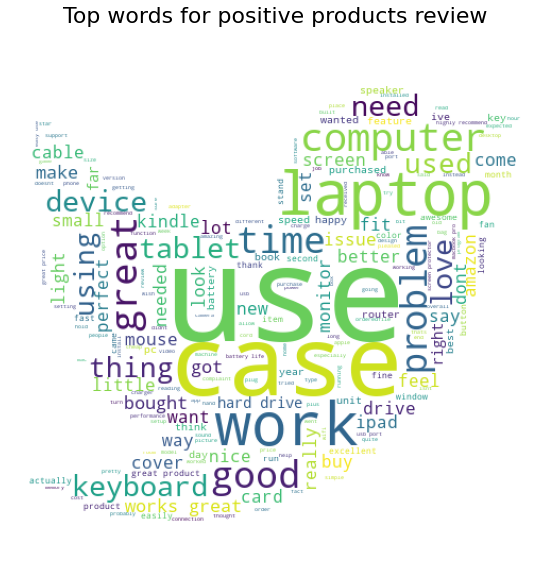

In [ ]:
from PIL import Image
from wordcloud import WordCloud

twitter_mask = np.array(Image.open('/content/twitter_mask3.jpg'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in sampled_df.loc[sampled_df['sentiment'] == 1, 'message_clean']))
plt.figure(figsize=(18,10))
plt.title('Top words for positive products review ', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

> ##### Negative sentiment

In [ ]:
from typing import DefaultDict

corpus_disaster_tweets = create_corpus_df(sampled_df, 0)

dic=DefaultDict(int)
for word in corpus_disaster_tweets:
    dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
top

[('just', 4307),
 ('work', 4130),
 ('use', 3796),
 ('product', 3622),
 ('like', 3560),
 ('case', 3272),
 ('good', 2977),
 ('time', 2867),
 ('dont', 2739),
 ('does', 2659)]

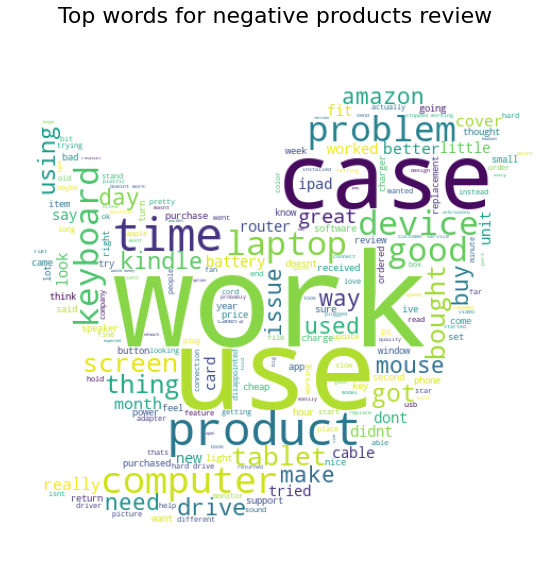

In [ ]:
from PIL import Image
from wordcloud import WordCloud

twitter_mask = np.array(Image.open('/content/twitter_mask3.jpg'))

wc = WordCloud(
    background_color='white', 
    max_words=200, 
    mask=twitter_mask,
)
wc.generate(' '.join(text for text in sampled_df.loc[sampled_df['sentiment'] == 0, 'message_clean']))
plt.figure(figsize=(20,10))
plt.title('Top words for negative products review ', 
          fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

> ### Second Cleaning - OPTIONAL

In [ ]:
# #split data-set to train and test

X = sampled_df['review_body']
Y = sampled_df['sentiment']

Y = np.array(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)




In [ ]:
# X_training clean set
X_train_cleaned = []

for val in X_train:
    val = removeHTML(val)
    val = removeSpecialChar(val)
    val = toLowerCase(val)
    removeStopWords(val) 
    X_train_cleaned.append(val)
    del val 

/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:270: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:332: UserWarning: "https://www.amazon.com/gp/product/B009LEP67S/ref=cm_cr_ryp_prd_ttl_sol_29" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:332: UserWarning: "https://youtu.be/Pv9uM2LXCL0" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:332: UserWarning: "https://www.amazon.com/gp/product/B00J9D4MZS/ref=cm_c

In [ ]:
# # Delete unused variables to reduce the memory usage.

del X_train

gc.collect()

29644

In [ ]:
gc.collect()

0

In [ ]:
# Display the cleaned data
X_train_cleaned[0:10]

['the power supply burning out would have been bad enough but the fact that it fried my gb ide barracuda is infuriating when it worked it worked on all kinds of devices that it supports however today i smelled smoke and quickly unplugged everything the case of the power supply was literally melting and i nearly burned myself picking it up i am certain it would have caught fire if i left it on for more seconds what s worse is the fact that this thing seems notorious for its power supply melting and frying hdds sometimes catching fire this goes to show you that you should read reviews even for cheapie purchases take a look at the reviews for this on newegg some people have luck with this product but have horror stories and many have the same problem i did don t take the gamble however consider this as a special gift for your enemies this holiday season',
 'this cover is great far exceeded my expectations protects my tablet better than the more expensive one i had before i would buy this 

In [ ]:
# X_training clean set
X_test_cleaned = []

for val in X_test:
    val = removeHTML(val)
    val = removeSpecialChar(val)
    val = toLowerCase(val)
    removeStopWords(val) 
    X_test_cleaned.append(val)
    del val 

In [ ]:
# # Delete unused variables to reduce the memory usage.

del X_test

gc.collect()

2019

In [ ]:
gc.collect()

0

In [ ]:
# Display the cleaned data
X_test_cleaned[:10]

['this otg works as described on my nexus tablet and on my other tablets i would recommend this product if your in need of one',
 'this is a nice stylus it seems sturdy and of good quality the price was very good as compared o brick and mortar stores',
 'as the title of my review states i upgraded to the from the ti that i have been using for years now and wow as the ti is still a pretty competent card i wasn t expecting the gains in performance that i in fact got if you are on the fence just do it you will be glad you did any current and for at least the near future title can be ran on ultra with xmsaa at what i m seeing exceeds fps battlefield crysis etc a note for people upgrading from an older card the takes an pin pcie and a pin pcie connector if you are like me and have a slightly older power supply many of the older units only have two pin pcie connectors although the comes with adapters the extensive research that i have done highly discourages people from utilizing the adapter

In [ ]:
# # Delete unused variables to reduce the memory usage.

del data
del X
del Y
del X_train
del X_test

gc.collect()

In [ ]:
x_tr_ar =  X_train_tvec.todense()

> ### Train the SVM model

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()), 
                 ('tfid', TfidfTransformer()),  
                 ('model', SVC())
                 ])
#from cuml.svm import SVC

        
#svm_est = SVC(C = 40, cache_size = 2000)


In [ ]:
# Fit the pipeline with the data

pipe.fit(X_train, Y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model', SVC())])

In [ ]:
y_pred_class = pipe.predict(X_test)
y_pred_train = pipe.predict(X_train)

print('Train: {}'.format(accuracy_score(Y_train, y_pred_train)))
print('Test: {}'.format(accuracy_score(Y_test, y_pred_class)))

Train: 0.9718562223991891
Test: 0.8851889387577819


In [ ]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 

#svm_predictions = svm_est.predict(tvec.transform(X_test_cleaned))   
svm_preds = pipe.predict(X_test)
report = classification_report(Y_test,svm_preds, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("yellow", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.830000,0.630000,0.720000,3173.000000
1,0.900000,0.960000,0.930000,10641.000000
accuracy,0.890000,0.890000,0.890000,0.890000
macro avg,0.870000,0.800000,0.820000,13814.000000
weighted avg,0.880000,0.890000,0.880000,13814.000000


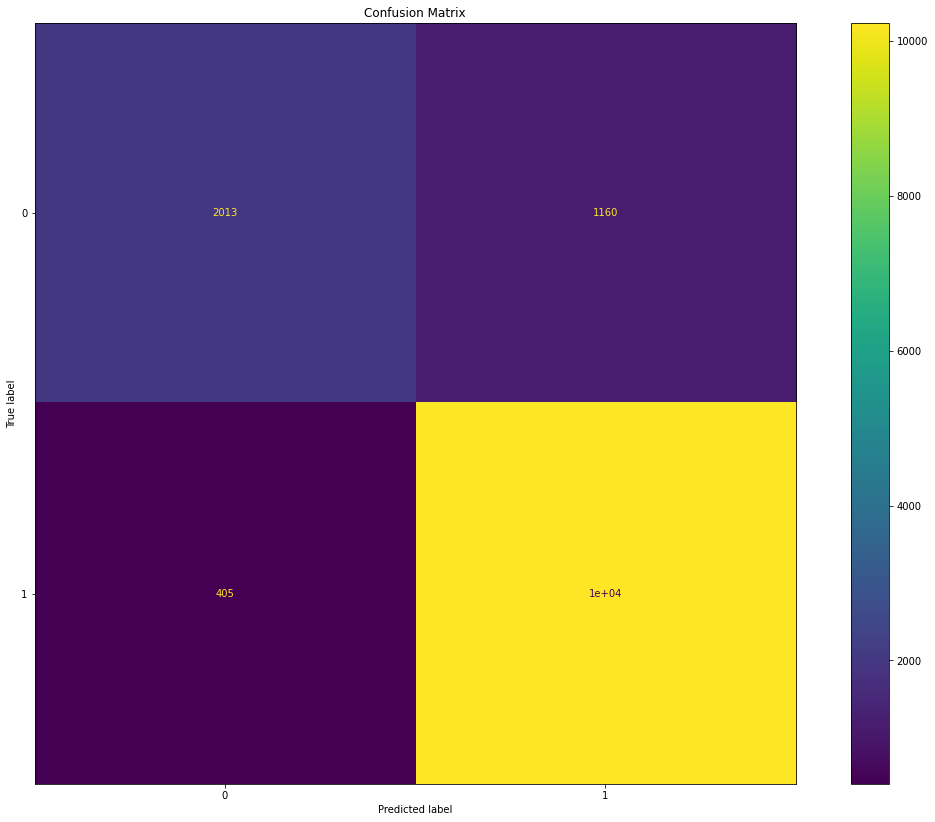

In [ ]:
# Confusion matrix: First type


cm = confusion_matrix(Y_test, svm_preds, labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=pipe.classes_) # cmap='RdBu_r')

disp.plot()
plt.title('Confusion Matrix') # fontsize = 15
plt.gcf().set_size_inches((20, 14))
plt.show()

In [ ]:
import plotly.figure_factory as ff

x_axes = ['Negative', 'Positive']
y_axes =  ['Positive', 'Negative']

def conf_matrix(z, x=x_axes, y=y_axes):
    
    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure 
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<b>Confusion matrix</b>',
                      xaxis = dict(title='Predicted value'),
                      yaxis = dict(title='Real value')
                     )

    # add colorbar
    fig['data'][0]['showscale'] = True
    
    return fig

In [ ]:
# Confusion Matirx: Second type 
conf_matrix(confusion_matrix(Y_test, svm_preds))


> #### Save the svm model

In [ ]:
import pickle 


filename = "svm_est_sa.sav"

# Save the trained model as a pickle string.
pickle.dump(pipe,open(filename, "wb") )
  

## Load the pickled model
svm_from_pickle = pickle.load(open(filename, "rb"))
  
# Use the loaded pickled model to make predictions
svm_from_pickle.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

> ### Train the XGBoost Classifier

In [ ]:
# Define the model
import xgboost as xgb

xgb_est = xgb.XGBClassifier(objective="binary:hinge", n_jobs=1, tree_method = 'gpu_hist')


In [ ]:
# Or use the the pipeline

pipe_xgb = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(
        objective="binary:hinge",
        learning_rate=0.1,
        max_depth=7,
        n_estimators=80,
        use_label_encoder=False,
        eval_metric='auc'
        #tree_method = 'gpu_hist'
        # colsample_bytree=0.8,
        # subsample=0.7,
        # min_child_weight=5,
    ))
])

In [ ]:
# Train the model
pipe_xgb.fit(X_train, Y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model',
                 XGBClassifier(eval_metric='auc', max_depth=7, n_estimators=80,
                               objective='binary:hinge',
                               use_label_encoder=False))])

In [ ]:
y_pred_class = pipe_xgb.predict(X_test)
y_pred_train = pipe_xgb.predict(X_train)

print('XGB Train Accuracy: {}'.format(accuracy_score(Y_train, y_pred_train)))
print('XGB Test Acuuracy: {}'.format(accuracy_score(Y_test, y_pred_class)))

XGB Train Accuracy: 0.8301418953160067
XGB Test Acuuracy: 0.8176487621253801


In [ ]:
# The classification report and confusion matrix of the classifier.

print(metrics.classification_report(y_test, xgbpred_y))

In [ ]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers 

## If you're using the second cleaning, you can use the following command:
#xgb_predictions = xgb_est.predict(tvec.transform(X_test_cleaned))   

## Otherwise, use these commands:
xgb_preds = pipe_xgb.predict(X_test)

report = classification_report(Y_test,xgb_preds, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("yellow", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.800000,0.280000,0.410000,3238.000000
1,0.820000,0.980000,0.890000,10576.000000
accuracy,0.810000,0.810000,0.810000,0.810000
macro avg,0.810000,0.630000,0.650000,13814.000000
weighted avg,0.810000,0.810000,0.780000,13814.000000


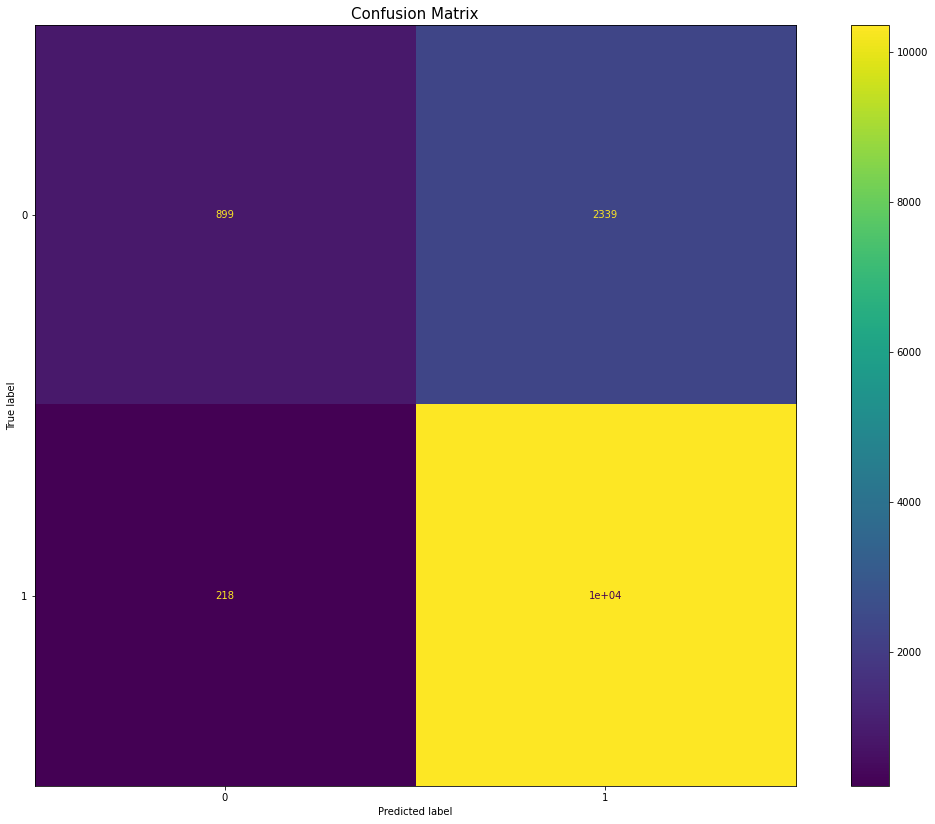

In [ ]:
# First type of Confusion matrix

cm = confusion_matrix(Y_test, xgb_preds, labels=pipe_xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=pipe_xgb.classes_ ) #cmap='RdBu_r'

disp.plot()
plt.title('Confusion Matrix',  fontsize = 15)
plt.gcf().set_size_inches((20, 14))
plt.show()

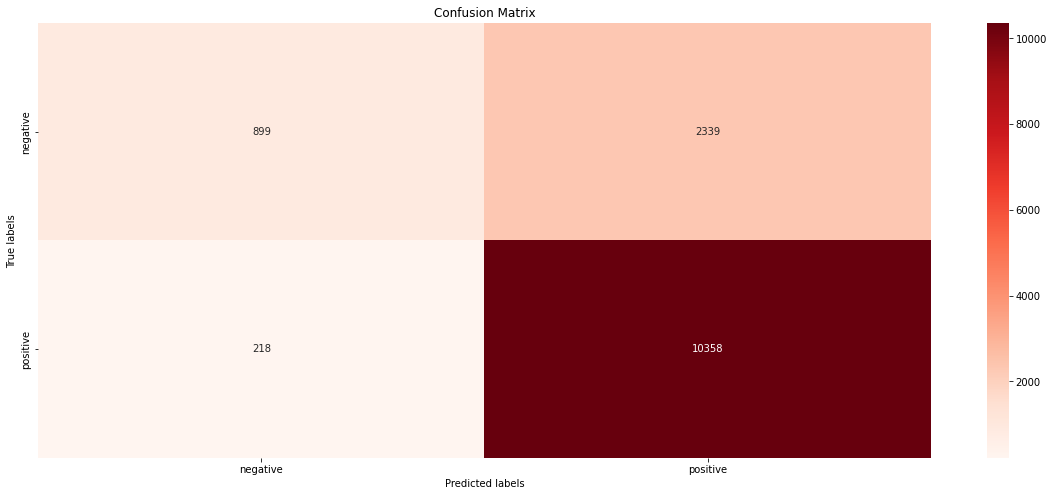

In [ ]:
# Second type of confusion matrix

ax= plt.subplot()
cm=confusion_matrix(Y_test,xgb_preds)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);
plt.gcf().set_size_inches((20, 8))
plt.show()

In [ ]:
# Third type of confusion Matrix

conf_matrix(confusion_matrix(Y_test, xgb_preds))


In [ ]:
# Or use this params to train the model
best_params = {'colsample_bytree': 0.4216420662689534,
              'gamma': 0.8014646438281954,
              'learning_rate': 0.042890776303271705,
              'max_depth': 9, 'n_estimators': 140,
              'objective': 'binary:hinge',
              'subsample': 0.6587137821013362,
              #'tree_method': 'gpu_hist'
              }

    
est_xgb = Pipeline([
    ('bow', CountVectorizer()), 
    ('tfid', TfidfTransformer()),  
    ('model', xgb.XGBClassifier(**best_params
    ))
])
 
est_xgb.fit(X_train, Y_train)


Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model',
                 XGBClassifier(colsample_bytree=0.4216420662689534,
                               gamma=0.8014646438281954,
                               learning_rate=0.042890776303271705, max_depth=9,
                               n_estimators=140, objective='binary:hinge',
                               subsample=0.6587137821013362))])

In [ ]:
# Predictions using the second params: 

y_pred_class2 = est_xgb.predict(X_test)
y_pred_train2 = est_xgb.predict(X_train)

print('XGB Train Accuracy 2: {}'.format(accuracy_score(Y_train, y_pred_train2)))
print('XGB Test Acuuracy 2: {}'.format(accuracy_score(Y_test, y_pred_class2)))

XGB Train Accuracy 2: 0.8358973430826033
XGB Test Acuuracy 2: 0.8219197915158535


In [ ]:
# Use these commands for predictions:
xgb_pred = est_xgb.predict(X_test)

report = classification_report(Y_test,xgb_pred, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("yellow", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

,precision,recall,f1-score,support
0,0.840000,0.290000,0.440000,3238.000000
1,0.820000,0.980000,0.890000,10576.000000
accuracy,0.820000,0.820000,0.820000,0.820000
macro avg,0.830000,0.640000,0.670000,13814.000000
weighted avg,0.830000,0.820000,0.790000,13814.000000


In [ ]:
'''
For CM:

supported values are:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 
'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 
'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 
'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 
'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 
'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 
'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 
'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 
'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 
'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 
'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 
'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r',
'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magm..





'''

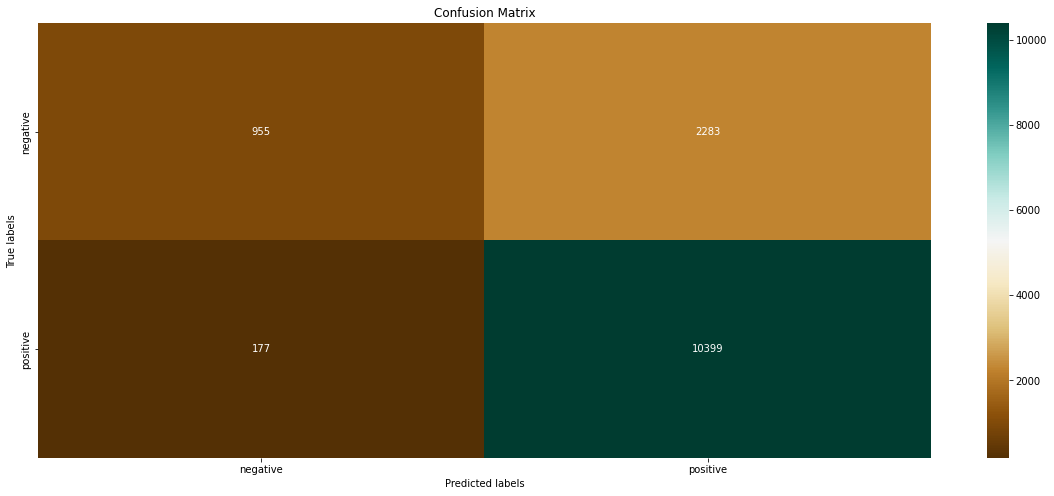

In [ ]:
# Second type of confusion matrix

ax= plt.subplot()
cm=confusion_matrix(Y_test,xgb_pred)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='BrBG');  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['negative', 'positive']); ax.yaxis.set_ticklabels(['negative', 'positive']);
plt.gcf().set_size_inches((20, 8))
plt.show()

> #### Save the XGB model 

In [ ]:
import pickle 


filename = "xgb_model1.sav"
filename1 = "xgb_moodel2.sav"
# Save the trained model as a pickle string.
pickle.dump(pipe_xgb,open(filename, "wb") )

# Save the trained model 2 as a pickle string.
pickle.dump(est_xgb,open(filename1, "wb") )

## Load the pickled model
xgb_from_pickle = pickle.load(open(filename, "rb"))

## Load the pickled model 2
xgb_from_pickle2 = pickle.load(open(filename1, "rb"))
  
# Use the loaded pickled model to make predictions
print("*************  The first model results:  ***********\n", xgb_from_pickle.predict(X_test))


# Use the loaded pickled model 2 to make predictions
print("*************  The second model results:  *********** \n", xgb_from_pickle2.predict(X_test))

*************  The first model results:  ***********
 [1 1 0 ... 1 1 1]
*************  The second model results:  *********** 
 [1 1 1 ... 1 1 1]


> ### Test the best model among these three using new data

In [37]:
import pickle

## Load the best model

filename = "/content/svm_est_sa.sav"

svm_pickle = pickle.load(open(filename, "rb"))
  


In [38]:
## First test

# expected output = 0 (Negative)
# actual output = 0 (Negative)

# testing the model with sample 'Negative' review

demo_review1 = np.array(['three days of use and it broke very disappointed in this product it worked perfectly for exactly three days and could not be resuscitated it was very inexpensive so i did not want to pay half again the price to ship it back for an exchange so the company would do nothing when they sent me an inquiry as to product satisfaction'])


# Use the loaded pickled model to make predictions
pred1=svm_pickle.predict(demo_review1)

print('The output using the SVM model:', pred1)

The output using the SVM model: [0]


In [39]:
## Second test

# expected output = 1 (Positive)
# actual output = 1 (Positive)

# testing the model with sample 'Negative' review

demo_review2 = np.array(['Excellent product. Works well and performs as expected.'])

# Use the loaded pickled model to make predictions
pred2=svm_pickle.predict(demo_review2)

print('The output using the SVM model:', pred2)

The output using the SVM model: [1]


In [ ]:
# testing the model with sample 'Negative' review

'''

demo_review = np.array(['three days of use and it broke very disappointed in this product it worked perfectly for exactly three days and could not be resuscitated it was very inexpensive so i did not want to pay half again the price to ship it back for an exchange so the company would do nothing when they sent me an inquiry as to product satisfaction'])
demo_review_X_test = tvec.transform(demo_review)
print(svr_lin.predict(demo_review_X_test))

# expected output = 0 (Negative)
# actual output = 0 (Negative)
'''

In [ ]:
# testing the model with sample 'Positive' review
'''
demo_review_2 = np.array(['Excellent product. Works well and performs as expected.'])
demo_review_X_test_2 = tvec.transform(demo_review_2)
print(svr_lin.predict(demo_review_X_test_2))

# expected output = 1 (Positive)
# actual output = 1 (Positive)
'''

> ### BERT

BERT (Bidirectional Encoder Representations from Transformers) is a recent paper published by researchers at Google AI Language. It has caused a stir in the Machine Learning community by presenting state-of-the-art results in a wide variety of NLP tasks, including Question Answering (SQuAD v1.1), Natural Language Inference (MNLI), and others.

BERT’s key technical innovation is applying the bidirectional training of Transformer, a popular attention model, to language modelling. This is in contrast to previous efforts which looked at a text sequence either from left to right or combined left-to-right and right-to-left training. The paper’s results show that a language model which is bidirectionally trained can have a deeper sense of language context and flow than single-direction language models. In the paper, the researchers detail a novel technique named Masked LM (MLM) which allows bidirectional training in models in which it was previously impossible.

Ref: https://www.kaggle.com/code/andreshg/nlp-glove-bert-tf-idf-lstm-explained/notebook#8.-BERT


In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

import transformers
from tqdm.notebook import tqdm
from tokenizers import BertWordPieceTokenizer

In [17]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])

    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    
except:
    strategy = tf.distribute.get_strategy()
    
print('Number of replicas in sync: ', strategy.num_replicas_in_sync)

Running on TPU  ['10.35.160.50:8470']
Number of replicas in sync:  8


In [18]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')

def bert_encode(data, maximum_length) :
    input_ids = []
    attention_masks = []

    for text in tqdm(data):
        encoded = tokenizer.encode_plus(
            text, 
            add_special_tokens=True,
            max_length=maximum_length,
            pad_to_max_length=True,

            return_attention_mask=True,
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
        
    return np.array(input_ids),np.array(attention_masks)

In [19]:
#X_train, X_test, Y_train, Y_test

texts =  X_train
target = Y_train

train_input_ids, train_attention_masks = bert_encode(texts,60)


  0%|          | 0/552549 [00:00<?, ?it/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [20]:
del texts
del X_train
del Y_train

gc.collect()

18

In [21]:
### Create the model

def create_model(bert_model):
  #with strategy.scope():
    input_ids = tf.keras.Input(shape=(60,),dtype='int32')
    attention_masks = tf.keras.Input(shape=(60,),dtype='int32')

    output = bert_model([input_ids,attention_masks])
    output = output[1]
    output = tf.keras.layers.Dense(32,activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(1,activation='sigmoid')(output)
    
    model = tf.keras.models.Model(inputs = [input_ids,attention_masks],outputs = output)
    #model.compile(Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [22]:
from transformers import TFBertModel

#
# Create model with TPU strategy

with strategy.scope():
  bert_model = TFBertModel.from_pretrained('bert-base-uncased')
  model = create_model(bert_model)
  model.compile(Adam(learning_rate=1e-5), loss='binary_crossentropy', metrics=['accuracy'])


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 60)]         0           []                               
                                                                                                  
 input_12 (InputLayer)          [(None, 60)]         0           []                               
                                                                                                  
 tf_bert_model_3 (TFBertModel)  TFBaseModelOutputWi  109482240   ['input_11[0][0]',               
                                thPoolingAndCrossAt               'input_12[0][0]']               
                                tentions(last_hidde                                               
                                n_state=(None, 60,                                          

In [23]:
# Train BERT model with my tuning
checkpoint = ModelCheckpoint('model_BERT.h5', monitor='val_loss', save_best_only=True)


history = model.fit(
    [train_input_ids, train_attention_masks],
    target,
    validation_split=0.2, 
    epochs=5,
    callbacks=[checkpoint],
    batch_size=10
)

Epoch 1/5
44204/44204 [==============================] - 3045s 67ms/step - loss: 0.2629 - accuracy: 0.8943 - val_loss: 0.2335 - val_accuracy: 0.9070
Epoch 2/5
44204/44204 [==============================] - 3013s 68ms/step - loss: 0.2096 - accuracy: 0.9184 - val_loss: 0.2366 - val_accuracy: 0.9091
Epoch 3/5
44204/44204 [==============================] - 3027s 68ms/step - loss: 0.1680 - accuracy: 0.9366 - val_loss: 0.2449 - val_accuracy: 0.9082
Epoch 4/5
44204/44204 [==============================] - 3090s 70ms/step - loss: 0.1281 - accuracy: 0.9533 - val_loss: 0.2867 - val_accuracy: 0.9039
Epoch 5/5
44204/44204 [==============================] - 3069s 69ms/step - loss: 0.0972 - accuracy: 0.9660 - val_loss: 0.3181 - val_accuracy: 0.9048


In [24]:
def plot_learning_curves(history, arr):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    for idx in range(2):
        ax[idx].plot(history.history[arr[idx][0]])
        ax[idx].plot(history.history[arr[idx][1]])
        ax[idx].legend([arr[idx][0], arr[idx][1]],fontsize=18)
        ax[idx].set_xlabel('A ',fontsize=16)
        ax[idx].set_ylabel('B',fontsize=16)
        ax[idx].set_title(arr[idx][0] + ' X ' + arr[idx][1],fontsize=16)

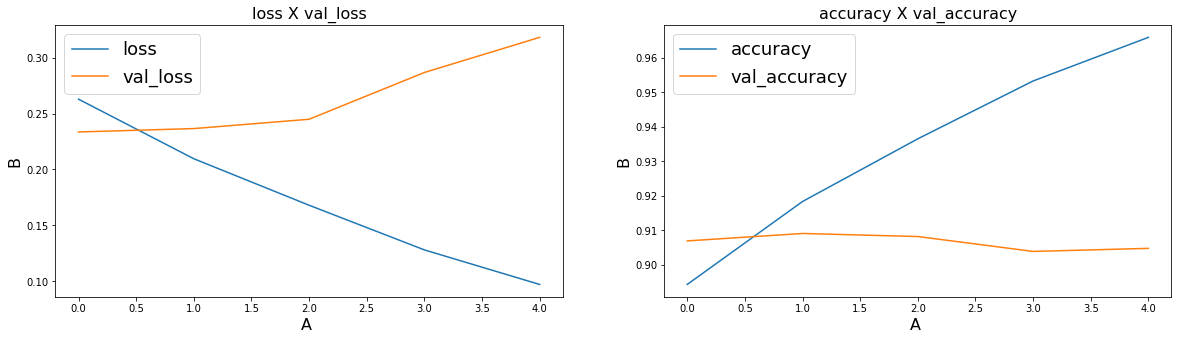

In [25]:
plot_learning_curves(history, [['loss', 'val_loss'],['accuracy', 'val_accuracy']])


In [26]:
# Do the same thing for testing phase
texts_test = X_test
target_test = Y_test

test_input_ids, test_attention_masks = bert_encode(texts_test,60)

  0%|          | 0/138138 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/transformers/tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [27]:
########## Evaluation

model.evaluate([test_input_ids, test_attention_masks])

4317/4317 [==============================] - 84s 18ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [28]:
######## Prediction

# Prediction by BERT model with my tuning
model.load_weights('model_BERT.h5')
test_pred_BERT = model.predict([test_input_ids, test_attention_masks])
test_pred_BERT_int = test_pred_BERT.round().astype('int')

4317/4317 [==============================] - 84s 18ms/step


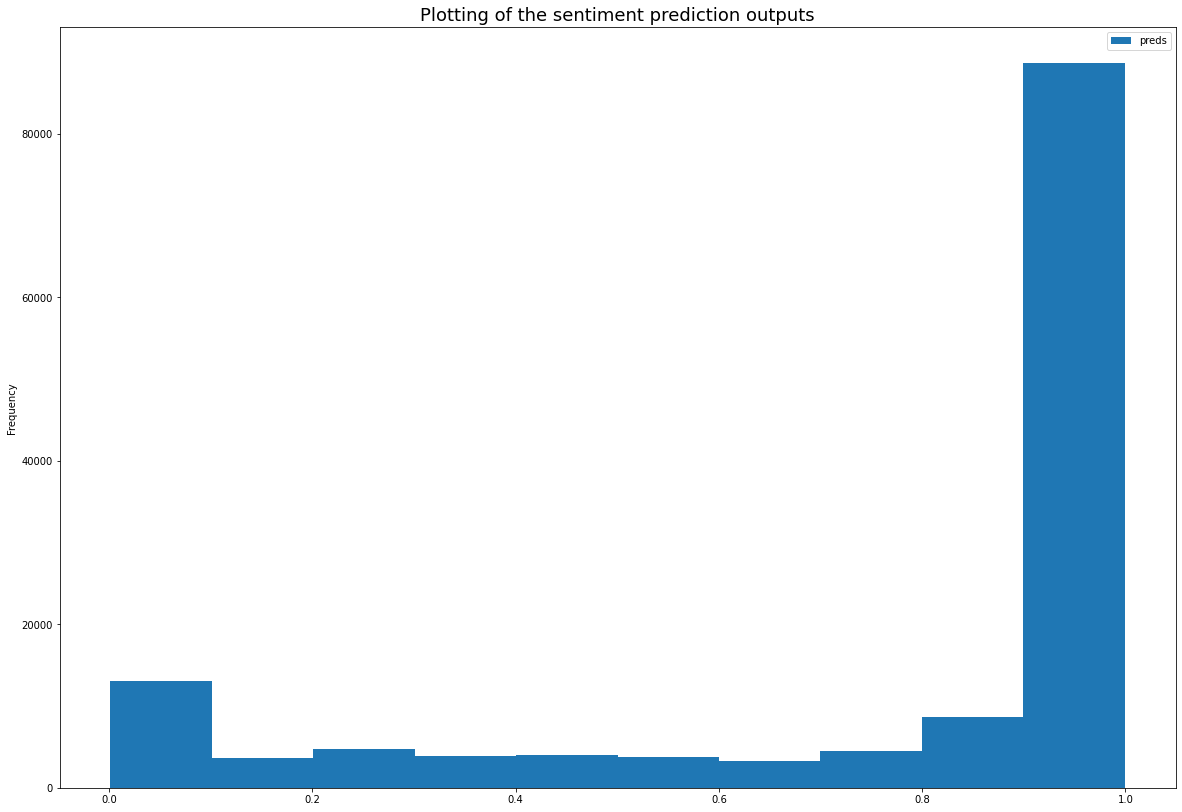

In [33]:
pred = pd.DataFrame(test_pred_BERT, columns=['preds'])
pred.plot.hist()

plt.title('Plotting of the sentiment prediction outputs', fontsize = 18) # fontsize = 15
plt.gcf().set_size_inches((20, 14))
plt.show()


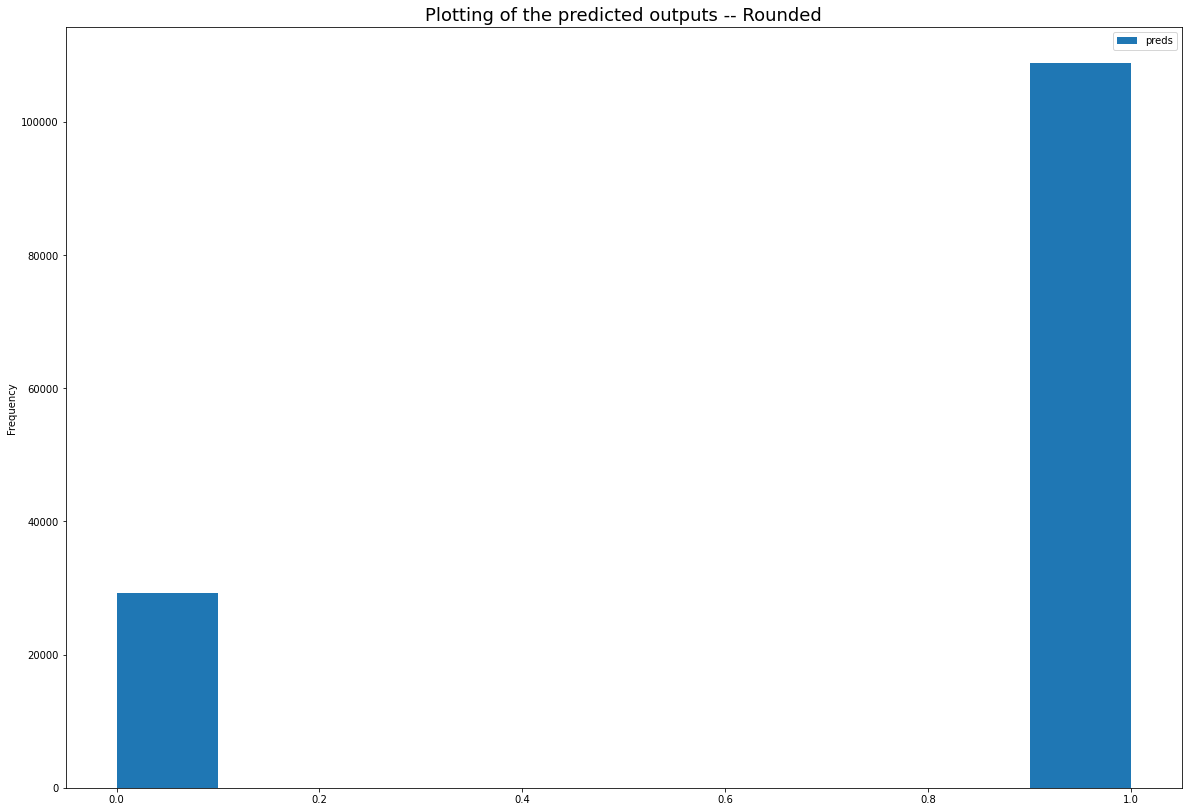

In [34]:
pred_round= pd.DataFrame(test_pred_BERT_int, columns=['preds'])
pred_round.plot.hist()
plt.title('Plotting of the predicted outputs -- Rounded', fontsize = 18) # fontsize = 15
plt.gcf().set_size_inches((20, 14))
plt.show()


> # Appendix: OPTIONAL

In [ ]:
# create a TPU model using Keras:
import os 

tpu_model = tf.contrib.tpu.keras_to_tpu_model(
    model,
    strategy=tf.contrib.tpu.TPUDistributionStrategy(
        tf.contrib.cluster_resolver.TPUClusterResolver(
            tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
    )
)

In [ ]:
# TPU Estimator:

my_tpu_estimator = tf.contrib.tpu.TPUEstimator(
    model_fn=my_model_fn,
    config=tf.contrib.tpu.RunConfig()
    use_tpu=False)

In [ ]:
# TPU Operation Configurations:

my_tpu_run_config = tf.contrib.tpu.RunConfig(
    master=master,
    evaluation_master=master,
    model_dir=FLAGS.model_dir,
    session_config=tf.ConfigProto(
        allow_soft_placement=True, log_device_placement=True),
    tpu_config=tf.contrib.tpu.TPUConfig(FLAGS.iterations,
                                        FLAGS.num_shards),
)


In [ ]:
# TPU Optimization:

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
if FLAGS.use_tpu:
  optimizer = tf.contrib.tpu.CrossShardOptimizer(optimizer)


> ### Convert Abbreviation

In [ ]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens", #"que pasa",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [ ]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
def convert_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

In [ ]:
# Thanks to https://www.kaggle.com/rftexas/text-only-kfold-bert
def convert_abbrev_in_text(text):
    tokens = word_tokenize(text)
    tokens = [convert_abbrev(word) for word in tokens]
    text = ' '.join(tokens)
    return text

> ### Summary statistics of the training set

In [ ]:
# Plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go


In [ ]:
all_words = []

for text in X_train_cleaned:
  text.lower()
  all_words.append(text.split())




#all_words = X_train_cleaned.split(expand=True).unstack().value_counts()

In [ ]:
words_counts = {}

for w in all_words:
  for ww in w:
    print(ww)
    if ww in list(words_counts.keys()):
      words_counts[ww] += 1
    else:
      words_counts[ww] = 0

Streaming output truncated to the last 5000 lines.
m
doing
wrong
on
the
plus
side
the
screen
is
clear
and
bright
and
the
tablet
is
light
after
seeing
how
challenging
this
tablet
is
to
use
and
seeing
it
s
problems
i
don
t
want
to
bother
with
it
i
received
this
tablet
to
review
at
no
cost
as
a
part
of
the
amazon
vine
program
if
i
had
paid
for
it
i
d
be
returning
it
personally
i
d
recommend
that
if
at
all
possible
spring
for
the
ipad
mini
for
an
additional
you
ll
have
it
for
years
and
there
s
just
no
comparison
at
all
it
s
so
easy
to
use
and
has
so
many
fantastic
features
this
is
an
added
tool
to
get
most
out
of
this
device
added
storage
space
great
product
this
thing
is
sturdy
well
made
and
feels
like
just
another
key
on
your
key
chain
great
buy
i
highly
recommend
love
it
works
as
described
after
a
year
of
use
there
is
still
no
problems
with
the
product
i
am
using
the
gb
version
of
the
tablet
with
a
gb
microsdxc
card
i
have
the
keyboard
dock
and
the
caseen
folio
case
which
it
is
always
i

KeyboardInterrupt: ignored

In [ ]:
list(words_counts.keys())

In [ ]:
all_words = all_words.value_counts()

In [ ]:

data = [go.Bar(
            x = all_words.index.values[2:50],
            y = all_words.values[2:50],
            marker= dict(colorscale='Jet',
                         color = all_words.values[2:100]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 (Uncleaned) Word frequencies in the training dataset'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [ ]:
# Convert a collection of raw documents to a matrix of TF-IDF features. This is required so as to train the model using features instead of 
# raw strings.
tvec = TfidfVectorizer(use_idf=True)  #, strip_accents='ascii')

X_train_tvec = tvec.fit_transform(X_train_cleaned)

In [ ]:
# Let's print vocabulary
tvec.vocabulary_ 


{'initially': 55439,
 'loved': 65475,
 'this': 113290,
 'backpack': 8961,
 'but': 14861,
 'the': 112364,
 'zipper': 129658,
 'tabs': 110426,
 'all': 3375,
 'came': 15761,
 'lose': 65330,
 'very': 122061,
 'quickly': 89853,
 'less': 63215,
 'than': 112146,
 'year': 128651,
 'tried': 116422,
 'to': 114643,
 'get': 45750,
 'in': 54369,
 'touch': 115383,
 'with': 126282,
 'spigen': 105255,
 'for': 42619,
 'replacement': 93682,
 'nobody': 75027,
 'even': 37321,
 'acknowledged': 1039,
 'my': 72855,
 'message': 68816,
 'bought': 13178,
 'replace': 93664,
 'an': 4432,
 'older': 77298,
 'linksys': 64147,
 'wap': 123706,
 'juniper': 59654,
 'firewall': 41352,
 'combo': 20541,
 'had': 48790,
 'running': 96730,
 'home': 51579,
 'network': 74170,
 'figured': 40858,
 'recent': 91641,
 'device': 28952,
 'that': 112243,
 'did': 29376,
 'most': 71595,
 'of': 76822,
 'functions': 44311,
 'two': 117425,
 'devices': 28992,
 'was': 123907,
 'replacing': 93711,
 'setup': 99969,
 'straightforward': 107422,
 

In [ ]:
# Print feature names
tvec.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['aa',
 'aaa',
 'aaaa',
 'aaaaa',
 'aaaaaa',
 'aaaaaaa',
 'aaaaaaaa',
 'aaaaaaaaa',
 'aaaaaaaaaaa',
 'aaaaaaaaaaaa',
 'aaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaaaaaaaaaaa',
 'aaaaaaaaaaaaaaaawesoooooooooooooooome',
 'aaaaaaaaaaaal',
 'aaaaaaaaand',
 'aaaaaaaamazing',
 'aaaaah',
 'aaaaahmmaaziing',
 'aaaaamazing',
 'aaaaand',
 'aaaaarrrrgggg',
 'aaaaarrrrrggggghhhhhhall',
 'aaaaaweeesome',
 'aaaad',
 'aaaah',
 'aaaahhh',
 'aaaahs',
 'aaaall',
 'aaaand',
 'aaaannnnndddd',
 'aaaare',
 'aaaarggghhh',
 'aaad',
 'aaadadtha',
 'aaah',
 'aaahhhhhhhhhhh',
 'aaahhss',
 'aaanyway',
 'aaare',
 'aaarg',
 'aaargh',
 'aaarrrgh',
 'aaas',
 'aaat',
 'aab',
 'aabattery',
 'aabnormal',
 'aabout',
 'aac',
 'aaccess',
 'aacenc',
 'aacover',
 'aacs',
 'aadding',
 'aadequately',
 'aads',
 'aadvertised',
 'aae',
 'aafc',
 'aafter',
 'aag',
 'aagain',
 'aaggghhhhhhhh',
 'aagn',
 'aah',
 'aahed',
 'aahhh',
 'aahs',
 'aaic',
 'aain',
 'aaitional',
 'a

In [ ]:
X_train_tvec.shape


(552524, 129956)

In [ ]:
# Let's print idf score of terms
tvec.idf_

array([ 7.65417605,  8.04430985, 10.75651806, ..., 13.52910678,
       13.52910678, 13.52910678])

In [ ]:
# Let’s transform it into array

X_train_tvec = X_train_tvec.toarray()

In [ ]:
def tfidf(data):
    tfidf_vectorizer = TfidfVectorizer()

    train = tfidf_vectorizer.fit_transform(data)

    return train, tfidf_vectorizer

X_train_tfidf, tfidf_vectorizer = tfidf(X_train_cleaned)
X_test_tfidf = tfidf_vectorizer.transform(X_test_cleaned)

In [ ]:
# get the first vector out (for the first document) 
first_vector_tfidfvectorizer=X_train_tvec[0] 
# place tf-idf values in a pandas data frame 
df_tvec = pd.DataFrame(first_vector_tfidfvectorizer.T.todense(), index=tvec.get_feature_names(), columns=["tfidf"])
df_tvec.sort_values(by=["tfidf"],ascending=False)


In [ ]:
# Visualizing the embeddings
def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            orange_patch = mpatches.Patch(color='orange', label='Not')
            blue_patch = mpatches.Patch(color='blue', label='Real')
            plt.legend(handles=[orange_patch, blue_patch], prop={'size': 30})

In [ ]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(X_train_tfidf, Y_train)
plt.show()

In [ ]:
# # Delete unused variables to reduce the memory usage.

del X_train_cleaned

gc.collect()

0

In [ ]:
gc.collect()

0

In [ ]:
type(X_train_tvec)

x_tr = X_train_tvec.toarray()